<a href="https://colab.research.google.com/github/2303a510b9/aiml/blob/main/2303a510b9_B_13(set_a_Q1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Prediction of Individual Household Electricity Consumption
1. Identify the top 5 reasons for Electricity Consumption?
2. Name the Date and Time when consumption was High?
3. Find the Max and Min levels of Electricity Consumption?
4. Which among the sub_metering system has the Highest Consumption?
5. Identify the consumption counts of Global Electricity Values?
6. Apply the K-means Clustering model to the dataset and evaluate its
   metrics, error and accuracy.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("household_power_consumption.txt", sep=';', low_memory=False, na_values=['?'])

data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
data.drop(['Date', 'Time'], axis=1, inplace=True)


for column in data.columns[:-1]:
    data[column] = pd.to_numeric(data[column], errors='coerce')

data = data.dropna()


In [3]:

reasons = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity',
           'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


mean_consumption = data[reasons].mean().sort_values(ascending=False)
print("Top 5 Contributors to Electricity Consumption:")
print(mean_consumption.head(5))

Top 5 Contributors to Electricity Consumption:
Voltage             240.803769
Sub_metering_3        6.529476
Global_intensity      4.707666
Sub_metering_2        1.332881
Sub_metering_1        1.156888
dtype: float64


In [4]:

max_consumption_row = data.loc[data['Global_active_power'].idxmax()]
print(f"Date and Time of Highest Consumption: {max_consumption_row['datetime']}")


Date and Time of Highest Consumption: 2009-02-22 17:09:00


In [5]:

max_consumption = data['Global_active_power'].max()
min_consumption = data['Global_active_power'].min()

print(f"Max Electricity Consumption: {max_consumption} kW")
print(f"Min Electricity Consumption: {min_consumption} kW")


Max Electricity Consumption: 11.122 kW
Min Electricity Consumption: 0.076 kW


In [6]:

sub_metering_totals = data[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].sum()
highest_sub_metering = sub_metering_totals.idxmax()

print(f"The sub-metering system with the highest consumption is: {highest_sub_metering}")


The sub-metering system with the highest consumption is: Sub_metering_3


In [7]:

consumption_bins = pd.cut(data['Global_active_power'], bins=10)
consumption_counts = consumption_bins.value_counts()

print("Global Electricity Value Counts:")
print(consumption_counts)


Global Electricity Value Counts:
Global_active_power
(0.065, 1.181]      1057915
(1.181, 2.285]       545098
(2.285, 3.39]        140304
(3.39, 4.494]         60356
(4.494, 5.599]        18576
(5.599, 6.704]         6791
(6.704, 7.808]         1652
(7.808, 8.913]          482
(8.913, 10.017]          67
(10.017, 11.122]         10
Name: count, dtype: int64


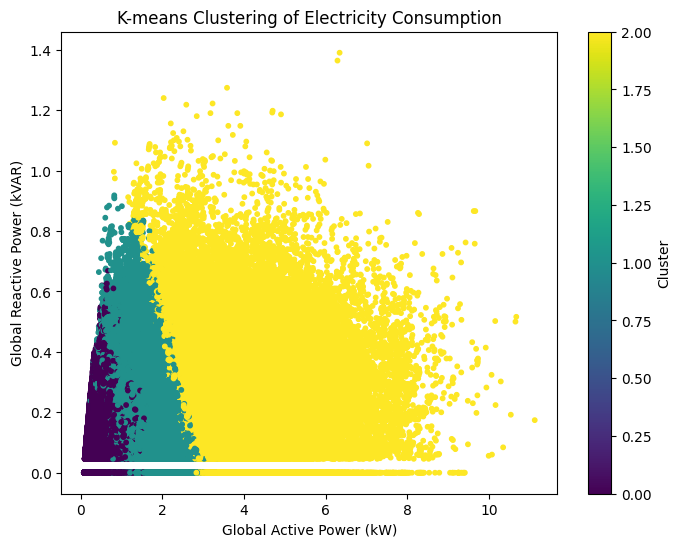

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


data = pd.read_csv("household_power_consumption.txt", sep=';', na_values=['?'], low_memory=False)


data['datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')
data.drop(columns=['Date', 'Time'], inplace=True)


data.iloc[:, :-1] = data.iloc[:, :-1].apply(pd.to_numeric, errors='coerce')


data.dropna(inplace=True)


features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])


kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(scaled_data)






plt.figure(figsize=(8, 6))
scatter = plt.scatter(data['Global_active_power'], data['Global_reactive_power'], c=data['cluster'], cmap='viridis', s=10)
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Global Reactive Power (kVAR)')
plt.title('K-means Clustering of Electricity Consumption')
plt.colorbar(scatter, label='Cluster')
plt.show()
